In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer_data = load_breast_cancer()

In [ ]:
type(cancer_data)

sklearn.utils.Bunch

In [ ]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
cancer_data.data.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size = 0.33 )

R, F = X_train.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(F,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

r = model.fit(X_train, Y_train, validation_data = (x_test,y_test), epochs = 100)

In [ ]:
print(model.evaluate(X_train, Y_train))
print(model.evaluate(x_test, y_test))

12/12 [==============================] - 0s 972us/step - loss: 0.1016 - accuracy: 0.9738
[0.1015564352273941, 0.9737532734870911]
6/6 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9681
[0.10305222123861313, 0.9680851101875305]


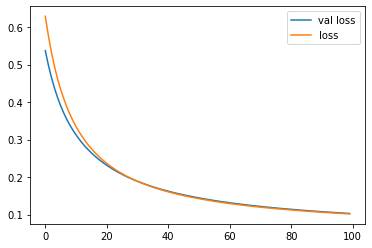

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

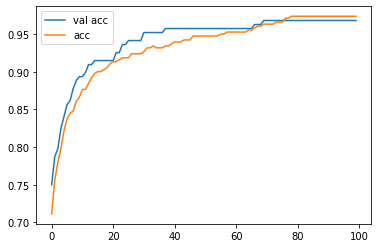

In [ ]:
plt.plot(r.history['val_accuracy'], label='val acc')
plt.plot(r.history['accuracy'], label = 'acc')
plt.legend()